In [1]:
#!pip install tensorflow numpy

### Lo corrí en Collab con gpus T4 porque local me tardaba mucho pero ya modifiqué la lectura del file al local.

In [2]:
# Levanto google drive.
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

# Modelo Recurrentes con Embeddings a nivel de caracter

In [4]:
#df = pd.read_csv('/content/drive/MyDrive/LSTM/acetylcholinesterase_02_bioactivity_data_preprocessed.csv')
df = pd.read_csv('data/acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [5]:
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,100.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,50000.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,300.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,800.0,6.096910


# Canonical_smiles To secuence

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Utilizando Tokenizer y pad_sequences de keras a nivel de caracter, obtener la entrada tokenizada. Por ejemplo:

**El smiles**:

'C[C@@]12CC[C@H]3[C@]4(C)CCC[C@@]5(C)C(=O)OCC[N+](C)(C)CCCCCCCCC[N+](C)(C)CCOC(=O)[C@]6(C)CCC[C@]7(C)[C@@H]6CC[C@@]68C[C@@H](OC(=O)CCCCCCCCC(=O)O[C@@H]1C[C@@]3(CC[C@@H]45)C2)[C@@](C)(CC[C@@H]76)C8.[Br-].[Br-]'

**Tendría que quedar algo asi (puede que no sea exacto):**

array([ 2, 11,  2, 13, 13, 12,  5,  7,  2,  2, 11,  2, 13, 16, 12, 10, 11,
        2, 13, 12, 15,  3,  2,  4,  2,  2,  2, 11,  2, 13, 13, 12, 23,  3,
        2,  4,  2,  3,  9,  6,  4,  6,  2,  2, 11,  8, 21, 12,  3,  2,  4,
        3,  2,  4,  2,  2,  2,  2,  2,  2,  2,  2,  2, 11,  8, 21, 12,  3,
        2,  4,  3,  2,  4,  2,  2,  6,  2,  3,  9,  6,  4, 11,  2, 13, 12,
       30,  3,  2,  4,  2,  2,  2, 11,  2, 13, 12, 35,  3,  2,  4, 11,  2,
       13, 13, 16, 12, 30,  2,  2, 11,  2, 13, 13, 12, 30, 36,  2, 11,  2,
       13, 13, 16, 12,  3,  6,  2,  3,  9,  6,  4,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  9,  6,  4,  6, 11,  2, 13, 13, 16, 12,  5,  2, 11,
        2, 13, 13, 12, 10,  3,  2,  2, 11,  2, 13, 13, 16, 12, 15, 23,  4,
        2,  7,  4, 11,  2, 13, 13, 12,  3,  2,  4,  3,  2,  2, 11,  2, 13,
       13, 16, 12, 35, 30,  4,  2, 36, 20, 11, 25, 26, 17, 12, 20, 11, 25,
       26, 17, 12], dtype=int32)
       

**Otro ejemplo:**
smiles: 'NC(=O)O'

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 8, 2, 3, 9, 6, 4, 6], dtype=int32)

**Tener en cuenta:**

- Ver cuanta es la máxima longitud para agregar el padding correspondiente
- En el ejemplo se agrego padding a la izquierda

In [7]:
max_len_idx = df['canonical_smiles'].apply(len).argmax()
min_len_idx = df['canonical_smiles'].apply(len).argmin()

In [8]:
min_sequence_length = df['canonical_smiles'].apply(len).min()
max_sequence_length = df['canonical_smiles'].apply(len).max()

In [9]:
max_sequence_length

204

In [10]:
X = df['canonical_smiles']
y = df['pIC50']

In [11]:
# Implementar tokenización y guardar en X_seq_pad el dataset tokenizado

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Extract canonical smiles from the DataFrame
canonical_smiles = X.tolist()

# Initialize the Tokenizer
tokenizer = Tokenizer(char_level=True)

# Fit the tokenizer on the canonical smiles
tokenizer.fit_on_texts(canonical_smiles)

# Tokenize and pad the canonical smiles sequences
canonical_smiles_tokenized = tokenizer.texts_to_sequences(canonical_smiles)
max_sequence_length = max(map(len, canonical_smiles_tokenized))
canonical_smiles_padded = pad_sequences(canonical_smiles_tokenized,
                                        maxlen=max_sequence_length)

# Convert padded sequences to a numpy array
X_seq_pad = np.array(canonical_smiles_padded)

In [13]:
X_seq_pad.shape[1]

204

In [14]:
# Find rows with inf values
rows_with_inf = np.any(np.isinf(X_seq_pad), axis=1)

# Remove rows with inf values
X_seq_pad = X_seq_pad[~rows_with_inf]

X_seq_pad.shape

(6157, 204)

In [15]:
X_seq_pad[200]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 6, 1, 4, 1, 7, 1, 2, 6, 1, 9, 1, 4, 1, 1, 1, 1, 9,
       3, 1, 1, 1, 1, 7], dtype=int32)

# Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Convert labels to a numpy array
X_train, X_test, y_train, y_test = train_test_split(X_seq_pad, y, test_size=0.2, random_state=999)
rows_to_remove = slice(4100, 4150)
X_train = np.concatenate((X_train[:rows_to_remove.start], X_train[rows_to_remove.stop:]), axis=0)
y_train = np.concatenate((y_train[:rows_to_remove.start], y_train[rows_to_remove.stop:]), axis=0)

In [18]:
# Remove specific rows from X_train and y_train
rows_to_remove = slice(4100, 4150)
X_train = np.concatenate((X_train[:rows_to_remove.start], X_train[rows_to_remove.stop:]), axis=0)
y_train = np.concatenate((y_train[:rows_to_remove.start], y_train[rows_to_remove.stop:]), axis=0)

In [19]:
len(X_train), len(y_train), len(X_test) , len(y_test)

(4825, 4825, 1232, 1232)

# Network Model

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import backend as K

In [21]:
# Métrica
def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [22]:
# vocab_size = # Completar largo del vocabulario
vocab_size = len(list(tokenizer.word_index.keys()))

In [23]:
max_sequence_len = len(max(X_seq_pad, key=len))

# Armar modelo en keras de LSTM
El de abajo es un ejemplo propuesto pero puede armar otro similar (siempre con LSTM o GRU)

In [24]:
X_train[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  5,
        1,  2,  8,  5,  3,  1,  4,  8,  1,  2,  1,  3,  5,  1,  7,  6,  1,
        9,  1,  2,  1,  2,  6,  3,  1,  7, 10,  1, 12, 14, 11,  4,  1,  4,
        1,  1,  1,  1,  2,  5,  1,  3,  1,  4,  3,  1,  1,  1,  1,  1,  9],
      dtype=int32)

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, Dense, BatchNormalization, Activation, LSTM
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.metrics import MeanSquaredError, RootMeanSquaredError

# Build the sequential model
model = Sequential()

# Embedding layer
embedding_dim = 128
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=X_seq_pad.shape[1]))

# Bidirectional LSTM layer with L2 regularization
lstm_units = 128
model.add(Bidirectional(LSTM(units=lstm_units, return_sequences=False, kernel_regularizer=l2(0.01))))

# Dense layer with L2 regularization
dense_units = 256
model.add(Dense(units=dense_units, kernel_regularizer=l2(0.01)))

# Batch normalization layer
model.add(BatchNormalization())

# Activation layer
model.add(Activation('relu'))

# Output dense layer
model.add(Dense(units=1, activation='linear'))  # Use 'linear' activation for regression

# Print the model summary
model.summary()

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Compile the model
optimizer = RMSprop(learning_rate=0.001, clipvalue=0.1)
model.compile(optimizer=optimizer, loss='mse', metrics=[MeanSquaredError(), RootMeanSquaredError()])

# Print the model summary
#model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 204, 128)          4352      
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [26]:
mcp = ModelCheckpoint('models/best_model_{epoch}', save_best_only=True, save_format="h5")

In [31]:
import warnings

# Filter out all warnings
warnings.filterwarnings("ignore")

In [30]:
#history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), callbacks=[mcp])
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_scheduler, early_stopping,mcp])

Epoch 1/100
151/151 [==============================] - 10s 36ms/step - loss: 8.1090 - mean_squared_error: 5.5085 - root_mean_squared_error: 2.3470 - val_loss: 17.8243 - val_mean_squared_error: 16.3249 - val_root_mean_squared_error: 4.0404 - lr: 0.0010
Epoch 2/100
151/151 [==============================] - 3s 19ms/step - loss: 3.8618 - mean_squared_error: 2.6598 - root_mean_squared_error: 1.6309 - val_loss: 9.7641 - val_mean_squared_error: 8.8057 - val_root_mean_squared_error: 2.9674 - lr: 0.0010
Epoch 3/100
151/151 [==============================] - 4s 27ms/step - loss: 3.3417 - mean_squared_error: 2.5331 - root_mean_squared_error: 1.5916 - val_loss: 3.2814 - val_mean_squared_error: 2.5979 - val_root_mean_squared_error: 1.6118 - lr: 0.0010
Epoch 4/100
151/151 [==============================] - 3s 21ms/step - loss: 3.0050 - mean_squared_error: 2.4078 - root_mean_squared_error: 1.5517 - val_loss: 5.4408 - val_mean_squared_error: 4.9182 - val_root_mean_squared_error: 2.2177 - lr: 0.0010
E

151/151 [==============================] - 14s 96ms/step - loss: 1.9257 - mean_squared_error: 1.7400 - root_mean_squared_error: 1.3191 - val_loss: 2.0963 - val_mean_squared_error: 1.9150 - val_root_mean_squared_error: 1.3838 - lr: 5.0000e-04
Epoch 14/100
149/151 [============================>.] - ETA: 0s - loss: 1.9179 - mean_squared_error: 1.7403 - root_mean_squared_error: 1.3192

151/151 [==============================] - 15s 98ms/step - loss: 1.9163 - mean_squared_error: 1.7387 - root_mean_squared_error: 1.3186 - val_loss: 2.0846 - val_mean_squared_error: 1.9108 - val_root_mean_squared_error: 1.3823 - lr: 5.0000e-04
Epoch 15/100
151/151 [==============================] - 3s 20ms/step - loss: 1.8068 - mean_squared_error: 1.6367 - root_mean_squared_error: 1.2794 - val_loss: 2.0861 - val_mean_squared_error: 1.9197 - val_root_mean_squared_error: 1.3855 - lr: 5.0000e-04
Epoch 16/100
151/151 [==============================] - 3s 19ms/step - loss: 1.8092 - mean_squared_error: 1.6460 - root_mean_squared_error: 1.2830 - val_loss: 2.1855 - val_mean_squared_error: 2.0242 - val_root_mean_squared_error: 1.4227 - lr: 5.0000e-04
Epoch 17/100
151/151 [==============================] - 4s 28ms/step - loss: 1.7880 - mean_squared_error: 1.6302 - root_mean_squared_error: 1.2768 - val_loss: 2.1872 - val_mean_squared_error: 2.0300 - val_root_mean_squared_error: 1.4248 - lr: 5.0000e

151/151 [==============================] - 15s 103ms/step - loss: 1.7911 - mean_squared_error: 1.6367 - root_mean_squared_error: 1.2793 - val_loss: 1.8657 - val_mean_squared_error: 1.7143 - val_root_mean_squared_error: 1.3093 - lr: 5.0000e-04
Epoch 19/100
151/151 [==============================] - 3s 20ms/step - loss: 1.7307 - mean_squared_error: 1.5805 - root_mean_squared_error: 1.2572 - val_loss: 2.7105 - val_mean_squared_error: 2.5600 - val_root_mean_squared_error: 1.6000 - lr: 5.0000e-04
Epoch 20/100
151/151 [==============================] - 3s 19ms/step - loss: 1.7070 - mean_squared_error: 1.5573 - root_mean_squared_error: 1.2479 - val_loss: 1.9514 - val_mean_squared_error: 1.8046 - val_root_mean_squared_error: 1.3433 - lr: 5.0000e-04
Epoch 21/100
151/151 [==============================] - 3s 19ms/step - loss: 1.7015 - mean_squared_error: 1.5549 - root_mean_squared_error: 1.2470 - val_loss: 2.6256 - val_mean_squared_error: 2.4802 - val_root_mean_squared_error: 1.5749 - lr: 5.0000

151/151 [==============================] - 15s 100ms/step - loss: 1.6288 - mean_squared_error: 1.4823 - root_mean_squared_error: 1.2175 - val_loss: 1.7517 - val_mean_squared_error: 1.6064 - val_root_mean_squared_error: 1.2674 - lr: 5.0000e-04
Epoch 24/100
151/151 [==============================] - 3s 21ms/step - loss: 1.6052 - mean_squared_error: 1.4586 - root_mean_squared_error: 1.2077 - val_loss: 1.9168 - val_mean_squared_error: 1.7705 - val_root_mean_squared_error: 1.3306 - lr: 5.0000e-04
Epoch 25/100
151/151 [==============================] - 3s 19ms/step - loss: 1.5721 - mean_squared_error: 1.4254 - root_mean_squared_error: 1.1939 - val_loss: 1.7617 - val_mean_squared_error: 1.6154 - val_root_mean_squared_error: 1.2710 - lr: 5.0000e-04
Epoch 26/100
151/151 [==============================] - 3s 21ms/step - loss: 1.5539 - mean_squared_error: 1.4074 - root_mean_squared_error: 1.1863 - val_loss: 1.7938 - val_mean_squared_error: 1.6458 - val_root_mean_squared_error: 1.2829 - lr: 5.0000

151/151 [==============================] - 16s 104ms/step - loss: 1.5142 - mean_squared_error: 1.3661 - root_mean_squared_error: 1.1688 - val_loss: 1.7517 - val_mean_squared_error: 1.6055 - val_root_mean_squared_error: 1.2671 - lr: 5.0000e-04
Epoch 28/100
149/151 [============================>.] - ETA: 0s - loss: 1.4778 - mean_squared_error: 1.3308 - root_mean_squared_error: 1.1536

151/151 [==============================] - 15s 103ms/step - loss: 1.4876 - mean_squared_error: 1.3405 - root_mean_squared_error: 1.1578 - val_loss: 1.7249 - val_mean_squared_error: 1.5793 - val_root_mean_squared_error: 1.2567 - lr: 5.0000e-04
Epoch 29/100
151/151 [==============================] - 4s 25ms/step - loss: 1.4743 - mean_squared_error: 1.3275 - root_mean_squared_error: 1.1522 - val_loss: 1.7897 - val_mean_squared_error: 1.6428 - val_root_mean_squared_error: 1.2817 - lr: 5.0000e-04
Epoch 30/100
148/151 [============================>.] - ETA: 0s - loss: 1.4288 - mean_squared_error: 1.2820 - root_mean_squared_error: 1.1322

151/151 [==============================] - 15s 100ms/step - loss: 1.4273 - mean_squared_error: 1.2806 - root_mean_squared_error: 1.1316 - val_loss: 1.5943 - val_mean_squared_error: 1.4485 - val_root_mean_squared_error: 1.2035 - lr: 5.0000e-04
Epoch 31/100
151/151 [==============================] - 3s 20ms/step - loss: 1.4392 - mean_squared_error: 1.2928 - root_mean_squared_error: 1.1370 - val_loss: 1.6230 - val_mean_squared_error: 1.4771 - val_root_mean_squared_error: 1.2154 - lr: 5.0000e-04
Epoch 32/100
151/151 [==============================] - 4s 27ms/step - loss: 1.4064 - mean_squared_error: 1.2604 - root_mean_squared_error: 1.1227 - val_loss: 1.8295 - val_mean_squared_error: 1.6829 - val_root_mean_squared_error: 1.2973 - lr: 5.0000e-04
Epoch 33/100
151/151 [==============================] - 3s 20ms/step - loss: 1.3852 - mean_squared_error: 1.2382 - root_mean_squared_error: 1.1127 - val_loss: 1.6661 - val_mean_squared_error: 1.5182 - val_root_mean_squared_error: 1.2322 - lr: 5.0000

151/151 [==============================] - 15s 99ms/step - loss: 1.1796 - mean_squared_error: 1.0372 - root_mean_squared_error: 1.0184 - val_loss: 1.5033 - val_mean_squared_error: 1.3612 - val_root_mean_squared_error: 1.1667 - lr: 2.5000e-04
Epoch 38/100
151/151 [==============================] - 3s 20ms/step - loss: 1.1755 - mean_squared_error: 1.0342 - root_mean_squared_error: 1.0170 - val_loss: 1.5038 - val_mean_squared_error: 1.3639 - val_root_mean_squared_error: 1.1679 - lr: 2.5000e-04
Epoch 39/100
150/151 [============================>.] - ETA: 0s - loss: 1.1378 - mean_squared_error: 0.9983 - root_mean_squared_error: 0.9992

151/151 [==============================] - 15s 101ms/step - loss: 1.1347 - mean_squared_error: 0.9953 - root_mean_squared_error: 0.9976 - val_loss: 1.4589 - val_mean_squared_error: 1.3205 - val_root_mean_squared_error: 1.1491 - lr: 2.5000e-04
Epoch 40/100
151/151 [==============================] - 3s 20ms/step - loss: 1.1522 - mean_squared_error: 1.0142 - root_mean_squared_error: 1.0071 - val_loss: 1.6211 - val_mean_squared_error: 1.4835 - val_root_mean_squared_error: 1.2180 - lr: 2.5000e-04
Epoch 41/100
151/151 [==============================] - 3s 22ms/step - loss: 1.1492 - mean_squared_error: 1.0125 - root_mean_squared_error: 1.0062 - val_loss: 1.6343 - val_mean_squared_error: 1.4980 - val_root_mean_squared_error: 1.2239 - lr: 2.5000e-04
Epoch 42/100
151/151 [==============================] - 4s 25ms/step - loss: 1.1195 - mean_squared_error: 0.9833 - root_mean_squared_error: 0.9916 - val_loss: 1.5197 - val_mean_squared_error: 1.3838 - val_root_mean_squared_error: 1.1764 - lr: 2.5000

151/151 [==============================] - 14s 95ms/step - loss: 1.0203 - mean_squared_error: 0.8869 - root_mean_squared_error: 0.9418 - val_loss: 1.3892 - val_mean_squared_error: 1.2562 - val_root_mean_squared_error: 1.1208 - lr: 1.2500e-04
Epoch 46/100
151/151 [==============================] - ETA: 0s - loss: 1.0060 - mean_squared_error: 0.8733 - root_mean_squared_error: 0.9345

151/151 [==============================] - 16s 104ms/step - loss: 1.0060 - mean_squared_error: 0.8733 - root_mean_squared_error: 0.9345 - val_loss: 1.3795 - val_mean_squared_error: 1.2471 - val_root_mean_squared_error: 1.1167 - lr: 1.2500e-04
Epoch 47/100
151/151 [==============================] - 4s 27ms/step - loss: 0.9829 - mean_squared_error: 0.8509 - root_mean_squared_error: 0.9224 - val_loss: 1.3832 - val_mean_squared_error: 1.2514 - val_root_mean_squared_error: 1.1187 - lr: 1.2500e-04
Epoch 48/100
151/151 [==============================] - 3s 20ms/step - loss: 0.9841 - mean_squared_error: 0.8525 - root_mean_squared_error: 0.9233 - val_loss: 1.4340 - val_mean_squared_error: 1.3031 - val_root_mean_squared_error: 1.1415 - lr: 1.2500e-04
Epoch 49/100
151/151 [==============================] - 3s 20ms/step - loss: 0.9626 - mean_squared_error: 0.8319 - root_mean_squared_error: 0.9121 - val_loss: 1.4138 - val_mean_squared_error: 1.2832 - val_root_mean_squared_error: 1.1328 - lr: 1.2500

151/151 [==============================] - 16s 104ms/step - loss: 0.9813 - mean_squared_error: 0.8512 - root_mean_squared_error: 0.9226 - val_loss: 1.3389 - val_mean_squared_error: 1.2093 - val_root_mean_squared_error: 1.0997 - lr: 1.2500e-04
Epoch 51/100
151/151 [==============================] - 4s 27ms/step - loss: 0.9636 - mean_squared_error: 0.8344 - root_mean_squared_error: 0.9135 - val_loss: 1.3802 - val_mean_squared_error: 1.2512 - val_root_mean_squared_error: 1.1186 - lr: 1.2500e-04
Epoch 52/100
151/151 [==============================] - 3s 20ms/step - loss: 0.9563 - mean_squared_error: 0.8277 - root_mean_squared_error: 0.9098 - val_loss: 1.3439 - val_mean_squared_error: 1.2157 - val_root_mean_squared_error: 1.1026 - lr: 1.2500e-04
Epoch 53/100
151/151 [==============================] - 3s 19ms/step - loss: 0.9601 - mean_squared_error: 0.8318 - root_mean_squared_error: 0.9120 - val_loss: 1.3672 - val_mean_squared_error: 1.2393 - val_root_mean_squared_error: 1.1132 - lr: 1.2500

151/151 [==============================] - 14s 96ms/step - loss: 0.9252 - mean_squared_error: 0.7979 - root_mean_squared_error: 0.8933 - val_loss: 1.3092 - val_mean_squared_error: 1.1825 - val_root_mean_squared_error: 1.0874 - lr: 1.2500e-04
Epoch 56/100
151/151 [==============================] - 4s 28ms/step - loss: 0.9174 - mean_squared_error: 0.7908 - root_mean_squared_error: 0.8892 - val_loss: 1.3781 - val_mean_squared_error: 1.2515 - val_root_mean_squared_error: 1.1187 - lr: 1.2500e-04
Epoch 57/100
151/151 [==============================] - 3s 20ms/step - loss: 0.9073 - mean_squared_error: 0.7809 - root_mean_squared_error: 0.8837 - val_loss: 1.3255 - val_mean_squared_error: 1.1995 - val_root_mean_squared_error: 1.0952 - lr: 1.2500e-04
Epoch 58/100
151/151 [==============================] - 3s 20ms/step - loss: 0.9069 - mean_squared_error: 0.7810 - root_mean_squared_error: 0.8837 - val_loss: 1.3206 - val_mean_squared_error: 1.1950 - val_root_mean_squared_error: 1.0932 - lr: 1.2500e

151/151 [==============================] - 15s 98ms/step - loss: 0.8511 - mean_squared_error: 0.7266 - root_mean_squared_error: 0.8524 - val_loss: 1.3062 - val_mean_squared_error: 1.1820 - val_root_mean_squared_error: 1.0872 - lr: 6.2500e-05
Epoch 62/100
151/151 [==============================] - 3s 20ms/step - loss: 0.8434 - mean_squared_error: 0.7193 - root_mean_squared_error: 0.8481 - val_loss: 1.3239 - val_mean_squared_error: 1.1999 - val_root_mean_squared_error: 1.0954 - lr: 6.2500e-05
Epoch 63/100
151/151 [==============================] - 3s 20ms/step - loss: 0.8375 - mean_squared_error: 0.7139 - root_mean_squared_error: 0.8449 - val_loss: 1.3108 - val_mean_squared_error: 1.1871 - val_root_mean_squared_error: 1.0895 - lr: 6.2500e-05
Epoch 64/100
150/151 [============================>.] - ETA: 0s - loss: 0.8346 - mean_squared_error: 0.7110 - root_mean_squared_error: 0.8432

151/151 [==============================] - 16s 104ms/step - loss: 0.8336 - mean_squared_error: 0.7100 - root_mean_squared_error: 0.8426 - val_loss: 1.2910 - val_mean_squared_error: 1.1676 - val_root_mean_squared_error: 1.0805 - lr: 6.2500e-05
Epoch 65/100
151/151 [==============================] - ETA: 0s - loss: 0.8215 - mean_squared_error: 0.6983 - root_mean_squared_error: 0.8356

151/151 [==============================] - 14s 96ms/step - loss: 0.8215 - mean_squared_error: 0.6983 - root_mean_squared_error: 0.8356 - val_loss: 1.2580 - val_mean_squared_error: 1.1350 - val_root_mean_squared_error: 1.0654 - lr: 6.2500e-05
Epoch 66/100
151/151 [==============================] - 4s 27ms/step - loss: 0.8253 - mean_squared_error: 0.7023 - root_mean_squared_error: 0.8381 - val_loss: 1.2835 - val_mean_squared_error: 1.1606 - val_root_mean_squared_error: 1.0773 - lr: 6.2500e-05
Epoch 67/100
151/151 [==============================] - 3s 21ms/step - loss: 0.8087 - mean_squared_error: 0.6861 - root_mean_squared_error: 0.8283 - val_loss: 1.3125 - val_mean_squared_error: 1.1900 - val_root_mean_squared_error: 1.0909 - lr: 6.2500e-05
Epoch 68/100
151/151 [==============================] - 3s 19ms/step - loss: 0.8138 - mean_squared_error: 0.6915 - root_mean_squared_error: 0.8316 - val_loss: 1.2847 - val_mean_squared_error: 1.1625 - val_root_mean_squared_error: 1.0782 - lr: 6.2500e

151/151 [==============================] - 14s 96ms/step - loss: 0.7915 - mean_squared_error: 0.6706 - root_mean_squared_error: 0.8189 - val_loss: 1.2534 - val_mean_squared_error: 1.1326 - val_root_mean_squared_error: 1.0642 - lr: 3.1250e-05
Epoch 74/100
151/151 [==============================] - 3s 20ms/step - loss: 0.7817 - mean_squared_error: 0.6609 - root_mean_squared_error: 0.8130 - val_loss: 1.2571 - val_mean_squared_error: 1.1364 - val_root_mean_squared_error: 1.0660 - lr: 3.1250e-05
Epoch 75/100
151/151 [==============================] - 4s 28ms/step - loss: 0.7763 - mean_squared_error: 0.6556 - root_mean_squared_error: 0.8097 - val_loss: 1.2614 - val_mean_squared_error: 1.1408 - val_root_mean_squared_error: 1.0681 - lr: 3.1250e-05
Epoch 76/100
151/151 [==============================] - 3s 19ms/step - loss: 0.7704 - mean_squared_error: 0.6499 - root_mean_squared_error: 0.8062 - val_loss: 1.2848 - val_mean_squared_error: 1.1644 - val_root_mean_squared_error: 1.0791 - lr: 3.1250e

151/151 [==============================] - 14s 94ms/step - loss: 0.7458 - mean_squared_error: 0.6260 - root_mean_squared_error: 0.7912 - val_loss: 1.2523 - val_mean_squared_error: 1.1326 - val_root_mean_squared_error: 1.0642 - lr: 1.5625e-05
Epoch 82/100
151/151 [==============================] - 3s 20ms/step - loss: 0.7510 - mean_squared_error: 0.6312 - root_mean_squared_error: 0.7945 - val_loss: 1.2542 - val_mean_squared_error: 1.1346 - val_root_mean_squared_error: 1.0652 - lr: 1.5625e-05
Epoch 83/100
151/151 [==============================] - 3s 18ms/step - loss: 0.7469 - mean_squared_error: 0.6274 - root_mean_squared_error: 0.7921 - val_loss: 1.2742 - val_mean_squared_error: 1.1547 - val_root_mean_squared_error: 1.0746 - lr: 1.5625e-05
Epoch 84/100
151/151 [==============================] - ETA: 0s - loss: 0.7479 - mean_squared_error: 0.6284 - root_mean_squared_error: 0.7927

151/151 [==============================] - 17s 115ms/step - loss: 0.7479 - mean_squared_error: 0.6284 - root_mean_squared_error: 0.7927 - val_loss: 1.2500 - val_mean_squared_error: 1.1306 - val_root_mean_squared_error: 1.0633 - lr: 1.5625e-05
Epoch 85/100
151/151 [==============================] - 3s 20ms/step - loss: 0.7435 - mean_squared_error: 0.6240 - root_mean_squared_error: 0.7900 - val_loss: 1.2613 - val_mean_squared_error: 1.1419 - val_root_mean_squared_error: 1.0686 - lr: 1.5625e-05
Epoch 86/100
151/151 [==============================] - 3s 19ms/step - loss: 0.7511 - mean_squared_error: 0.6319 - root_mean_squared_error: 0.7949 - val_loss: 1.2573 - val_mean_squared_error: 1.1380 - val_root_mean_squared_error: 1.0668 - lr: 1.5625e-05
Epoch 87/100
151/151 [==============================] - 3s 20ms/step - loss: 0.7480 - mean_squared_error: 0.6287 - root_mean_squared_error: 0.7929 - val_loss: 1.2525 - val_mean_squared_error: 1.1333 - val_root_mean_squared_error: 1.0646 - lr: 1.5625

In [32]:
y_pred = model.predict(X_test)

39/39 [==============================] - 3s 19ms/step


# Score

In [33]:
r2 = 1 - ((y_test - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

In [34]:
r2
# 0.4984533246797399

0.5605206361532766

In [35]:
model.save('models/final_v1.h5', )

# Load model (solo si se grabo el modelo)

In [36]:
from tensorflow.keras.models import load_model

In [37]:
model_loaded = load_model('models/final_v1.h5', custom_objects={'R2': R2})

In [38]:
y_pred = model_loaded.predict(X_test)

39/39 [==============================] - 1s 11ms/step


¿Hasta que valores de r2 logró?

In [39]:
r2 = 1 - ((y_test - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
r2

0.5605206361532766

# Evaluación

<function matplotlib.pyplot.show(close=None, block=None)>

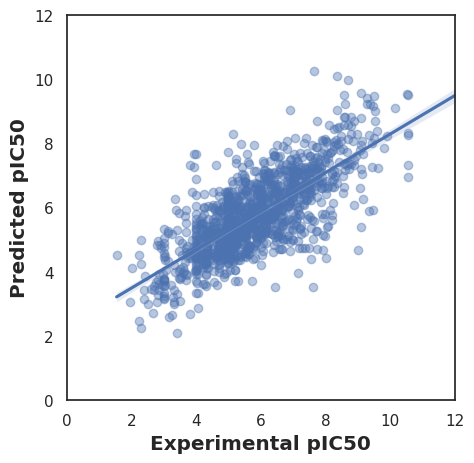

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show